TODO

* ~~Read csv and generate sample wordcloud+histogram~~
* ~~Implement case folding (stop words not being recognised)~~
* Iterate over all Qs

In [288]:
import pandas as pd

In [2]:
# pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
# pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [46]:
# df = pd.read_excel('Clean GS Master file Nov23 AM TRR.xlsx', sheet_name='Open Ended Questions', usecols='A')

In [382]:
# read csv ignoring potential N/As
df = pd.read_csv('Open Ended Questions-Table 1.csv', na_filter = False)

In [383]:
df

,What are the TWO major challenges faced by embryologists in the workplace?,Unnamed: 1,"What are the TWO major challenges faced by the embryology profession, in general?",Unnamed: 3,Provide TWO suggestions to improve embryologists' working conditions,Unnamed: 5,What is your career goal?
0,1,2,1,2,1,2,Open-Ended Response
1,Equality with clinical members,Poor pay,Shortage of trained staff,Equality,Improve number,Improve pay,Continue
2,Bullying by colleagues and managers,"Poorly designed protocols, technical ignorance...",Stress of delivering high quality work without...,Presence of narcissistic individuals destroyin...,Screening for sociopathic personality traits n...,Clinics must be staffed so that there is a goo...,To survive until retirement without suffering ...
3,Working hours and too many responsibilities,Salary,Access to training,Certification,Add reading and projects into basic workload n...,Understand for how many hours a brain can be f...,Get my ESHRE certification Publish paper thro...
4,burnout/stress,poor management,not enough highly trained staff,politics,better pay,better CPD opportunities,FRCPath
...,...,...,...,...,...,...,...
1252,low salaries,weekend and holiday work,low salaries,weekend and holiday work,increase salaries,close over christmas,Dont make a big mistake
1253,Low salaries,Weekend and holiday work,Low salary,Weekend and holiday work,Higher salaries,Close over Christmas holidays,Make babies and make people happy.
1254,Respect from other departments for the complex...,Financial compensation for overtime etc.,Financial participation: Owning shares,lack of respect for the work we do by doctors,Pay them!,Invite financial incentives to the embryologis...,I reached the glass ceiling. All I can do is h...
1255,limited staff,doctors,Salaries,Limit work opportunities,Better salaries,Flexible working hours,Laboratory director


In [384]:
# create a dict for the short an log column names
long_col_names = {'Q1a': df.columns[0], 'Q1b': df.columns[0], 'Q2a': df.columns[2], 'Q2b': df.columns[2], \
                  'Q3a': df.columns[4], 'Q3b': df.columns[4], 'Q4': df.columns[6]}

In [387]:
long_col_names

{'Q1a': 'What are the TWO major challenges faced by embryologists in the workplace?',
 'Q1b': 'What are the TWO major challenges faced by embryologists in the workplace?',
 'Q2a': 'What are the TWO major challenges faced by the embryology profession, in general? ',
 'Q2b': 'What are the TWO major challenges faced by the embryology profession, in general? ',
 'Q3a': "Provide TWO suggestions to improve embryologists' working conditions",
 'Q3b': "Provide TWO suggestions to improve embryologists' working conditions",
 'Q4': 'What is your career goal?'}

In [400]:
long_col_names['Q1a']

'What are the TWO major challenges faced by embryologists in the workplace?'

In [388]:
# rename the columns
df = df.rename(columns={df.columns[0]: 'Q1a', df.columns[1]: 'Q1b', df.columns[2]: 'Q2a',df.columns[3]: \
                        'Q2b', df.columns[4]: 'Q3a', df.columns[5]: 'Q3b', df.columns[6]: 'Q4'})

In [343]:
# propagate columns names to pairs
df = df.rename(columns={df.columns[1]: df.columns[0], df.columns[3]: df.columns[2], df.columns[5]: df.columns[4]})

In [389]:
df.columns[0]

'Q1a'

In [390]:
# remove first row
df = df.iloc[1:]

In [391]:
df

,Q1a,Q1b,Q2a,Q2b,Q3a,Q3b,Q4
1,Equality with clinical members,Poor pay,Shortage of trained staff,Equality,Improve number,Improve pay,Continue
2,Bullying by colleagues and managers,"Poorly designed protocols, technical ignorance...",Stress of delivering high quality work without...,Presence of narcissistic individuals destroyin...,Screening for sociopathic personality traits n...,Clinics must be staffed so that there is a goo...,To survive until retirement without suffering ...
3,Working hours and too many responsibilities,Salary,Access to training,Certification,Add reading and projects into basic workload n...,Understand for how many hours a brain can be f...,Get my ESHRE certification Publish paper thro...
4,burnout/stress,poor management,not enough highly trained staff,politics,better pay,better CPD opportunities,FRCPath
5,Recognizion,Trust,Handson training,Trust,Good laboratory training,Troubleshooting,Be confident in the work i do Academically st...
...,...,...,...,...,...,...,...
1252,low salaries,weekend and holiday work,low salaries,weekend and holiday work,increase salaries,close over christmas,Dont make a big mistake
1253,Low salaries,Weekend and holiday work,Low salary,Weekend and holiday work,Higher salaries,Close over Christmas holidays,Make babies and make people happy.
1254,Respect from other departments for the complex...,Financial compensation for overtime etc.,Financial participation: Owning shares,lack of respect for the work we do by doctors,Pay them!,Invite financial incentives to the embryologis...,I reached the glass ceiling. All I can do is h...
1255,limited staff,doctors,Salaries,Limit work opportunities,Better salaries,Flexible working hours,Laboratory director


In [392]:
# create a dictionary to store each of the columns, indexed on the column name
answers = {}
# create a dict of strings to store the column content, indexed on the column name
responses = {}
# iterate over the dataframe columns
for series_name, series in df.items():
    print(series_name)
    print(series)
    answers[series_name] = pd.DataFrame([' '.join(df[series_name].to_list())], columns=['content'])
    responses[series_name] = answers[series_name].values[0,0]

Q1a
1                          Equality with clinical members
2                     Bullying by colleagues and managers
3             Working hours and too many responsibilities
4                                          burnout/stress
5                                             Recognizion
                              ...                        
1252                                         low salaries
1253                                         Low salaries
1254    Respect from other departments for the complex...
1255                                        limited staff
1256                                             Training
Name: Q1a, Length: 1256, dtype: object
Q1b
1                                                Poor pay
2       Poorly designed protocols, technical ignorance...
3                                                  Salary
4                                         poor management
5                                                   Trust
                         

In [429]:
responses['Q1a']

'equality with clinical members bullying by colleagues and managers working hours and too many responsibilities burnout/stress recognizion stress created by no embryos/ less embryos/ poor quality embryos general workplace politics burnout due to working continously through weekends without breaks fertilization outcomes are laid on the embryologists lack of leadership recognition of our contribution in the art field time managment administration work work overload time spent at work workload overworked oocyte quality hard cases; bad sperm, fragile oocytes we are not being paid fairly (it\'s a specialized field) biopsy poor pay; lack of transparency of salary in the private sector time management with patients/doctors pression daily work hours and weekends employees shortage stress induced work environment recognition and sallary make no mistake space space never ever make a mistake workload burn out repeated manual processes emotional stress a good salary heavy workload scientific recog

In [426]:
# lower case
for col_name in responses:
    responses[col_name] = responses[col_name].casefold()

In [395]:
# show the rows with the offending N/A
print(df.loc[[1,2,3],'Q1a'])

1                 Equality with clinical members
2            Bullying by colleagues and managers
3    Working hours and too many responsibilities
Name: Q1a, dtype: object


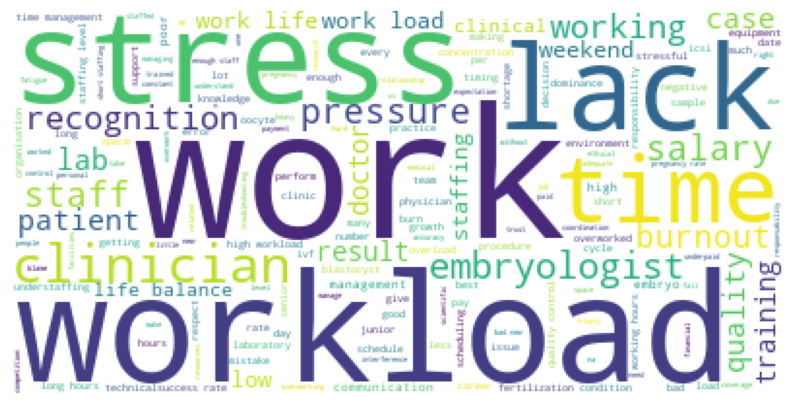

In [430]:
# generate one wordcloud
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

stopwords = STOPWORDS
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(responses['Q1a'])
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

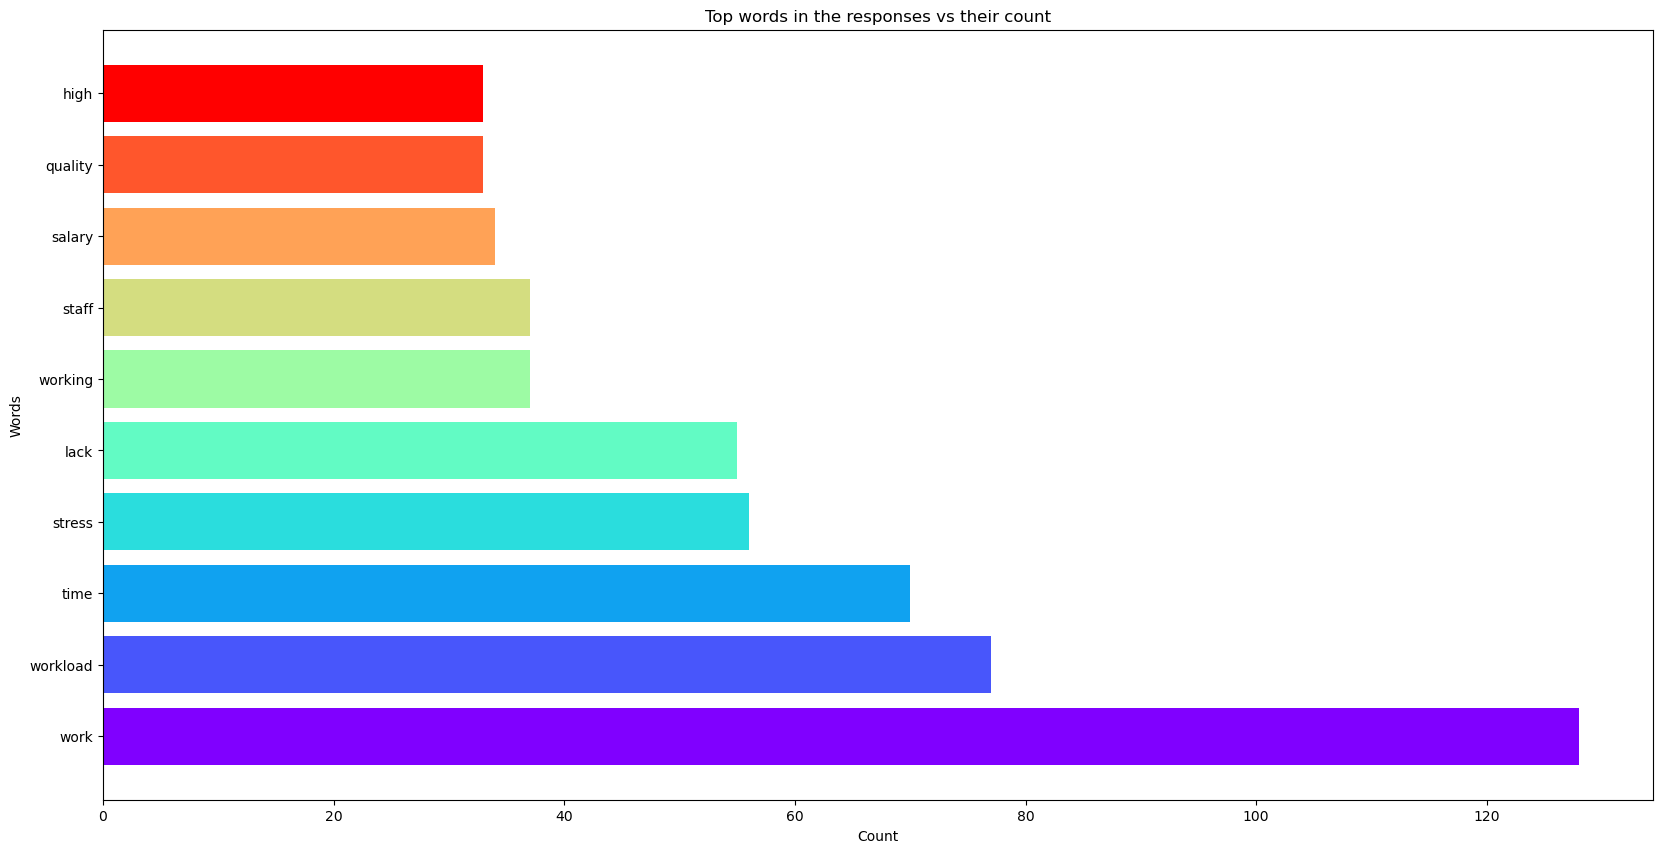

In [432]:
# Generate one histogram

filtered_words = [word for word in responses['Q1a'].split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)
words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10
plt.title('Top words in the responses vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)
plt.show()

What are the TWO major challenges faced by embryologists in the workplace?


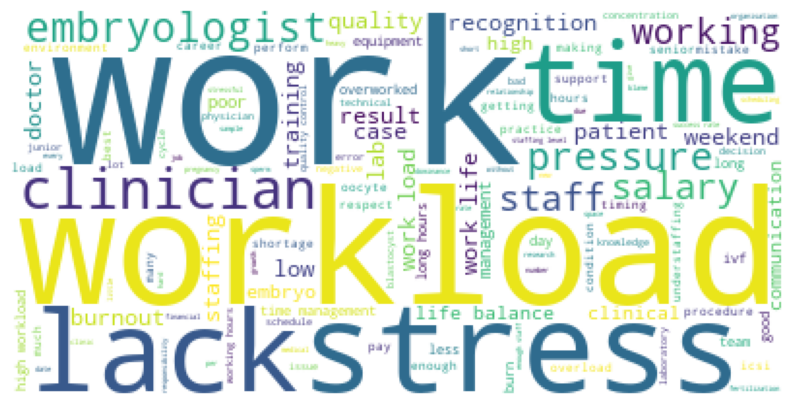

What are the TWO major challenges faced by embryologists in the workplace?


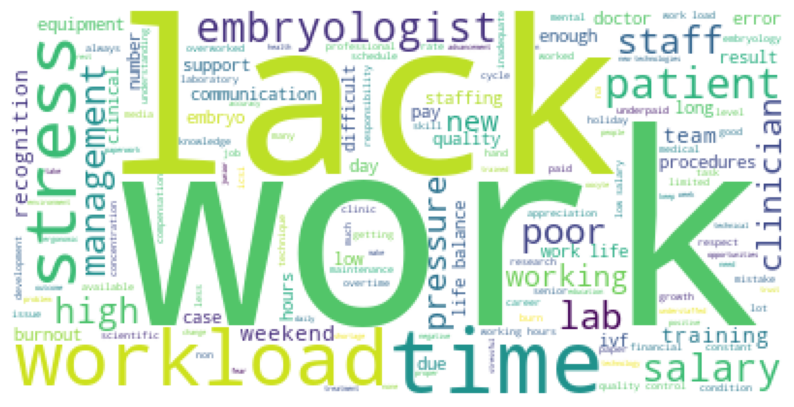

What are the TWO major challenges faced by the embryology profession, in general? 


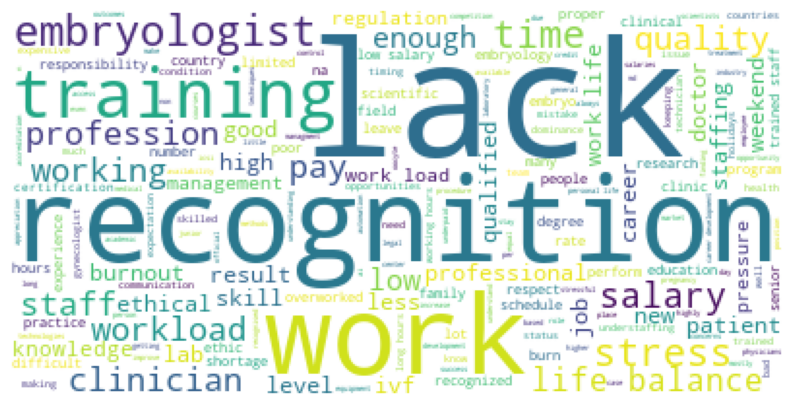

What are the TWO major challenges faced by the embryology profession, in general? 


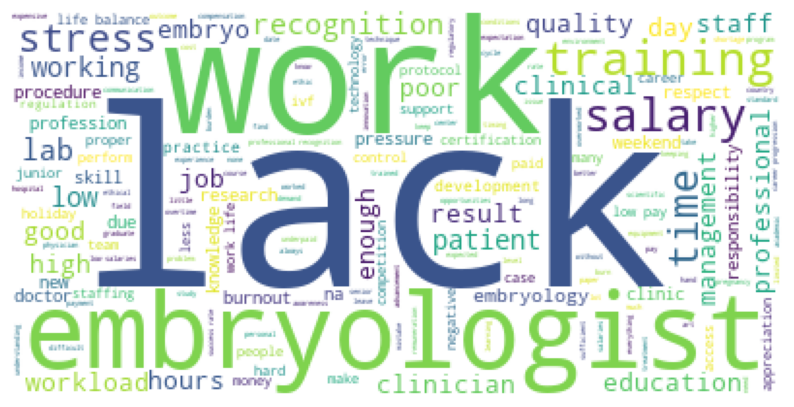

Provide TWO suggestions to improve embryologists' working conditions


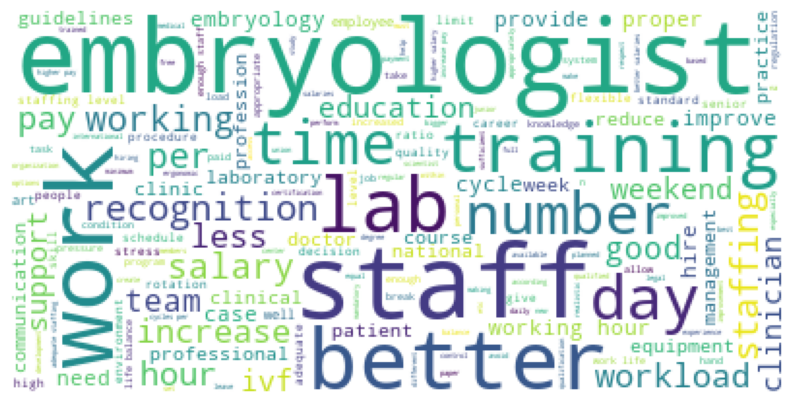

Provide TWO suggestions to improve embryologists' working conditions


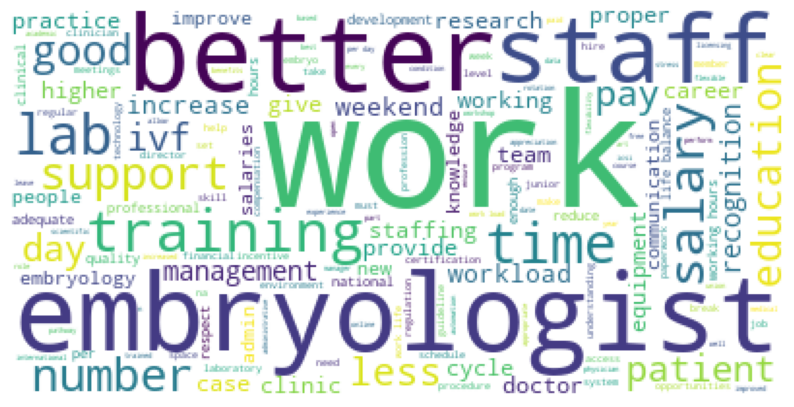

What is your career goal?


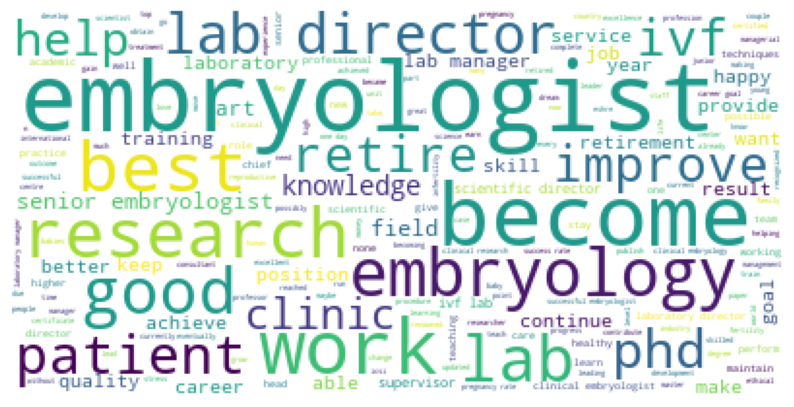

In [433]:
# iterate over all columns and generate wordclouds

for col_name in responses:
    print(long_col_names[col_name])
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(responses[col_name])
    rcParams['figure.figsize'] = 10, 20
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

What are the TWO major challenges faced by embryologists in the workplace?


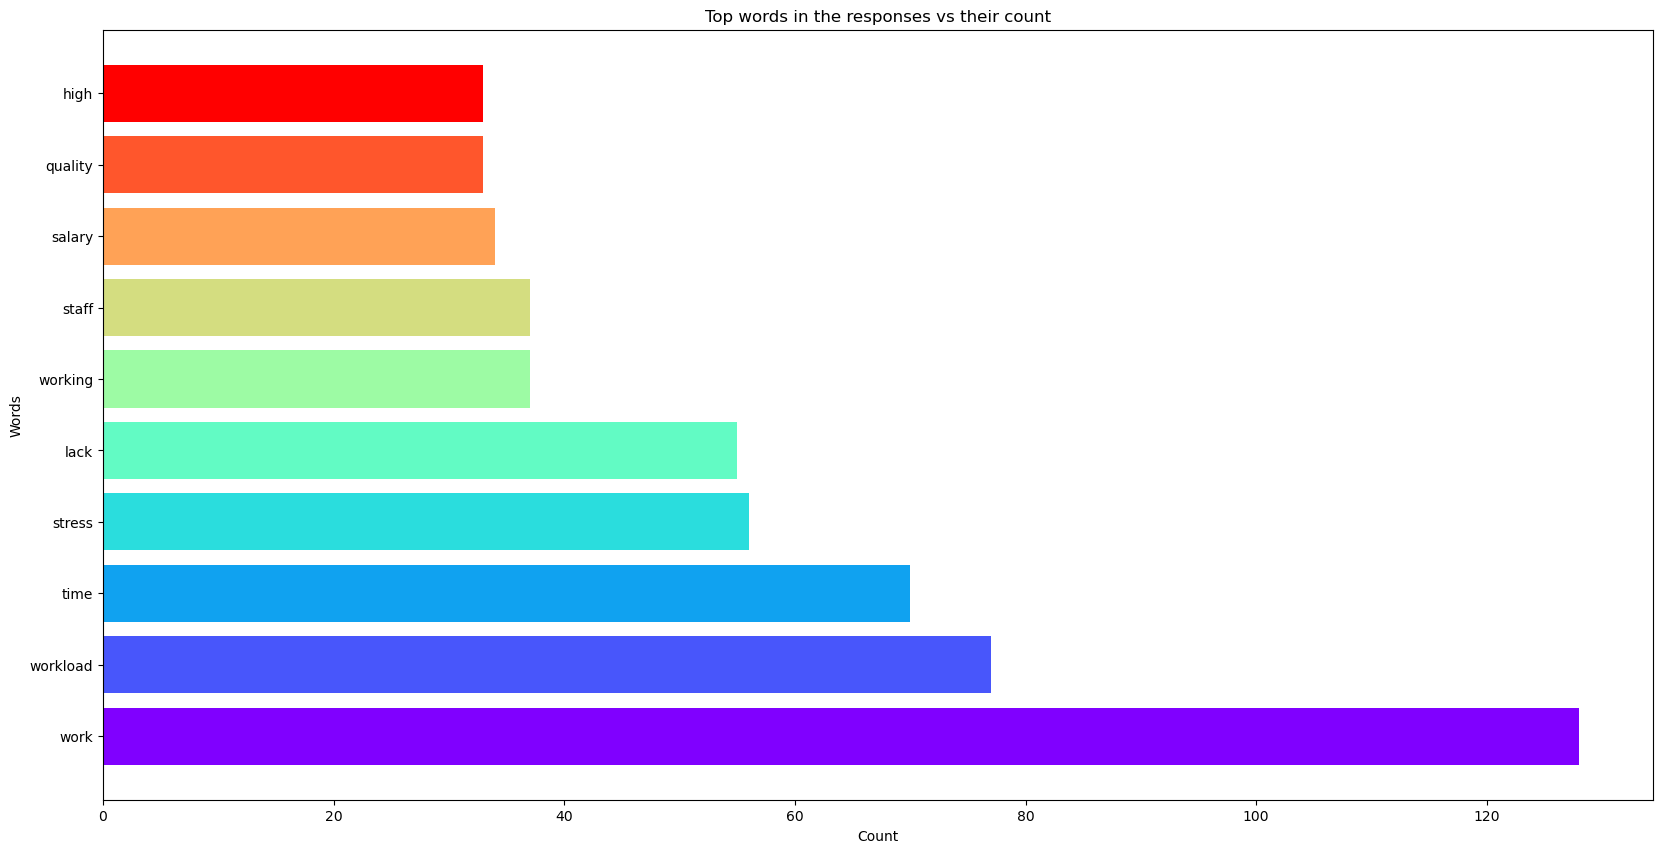

What are the TWO major challenges faced by embryologists in the workplace?


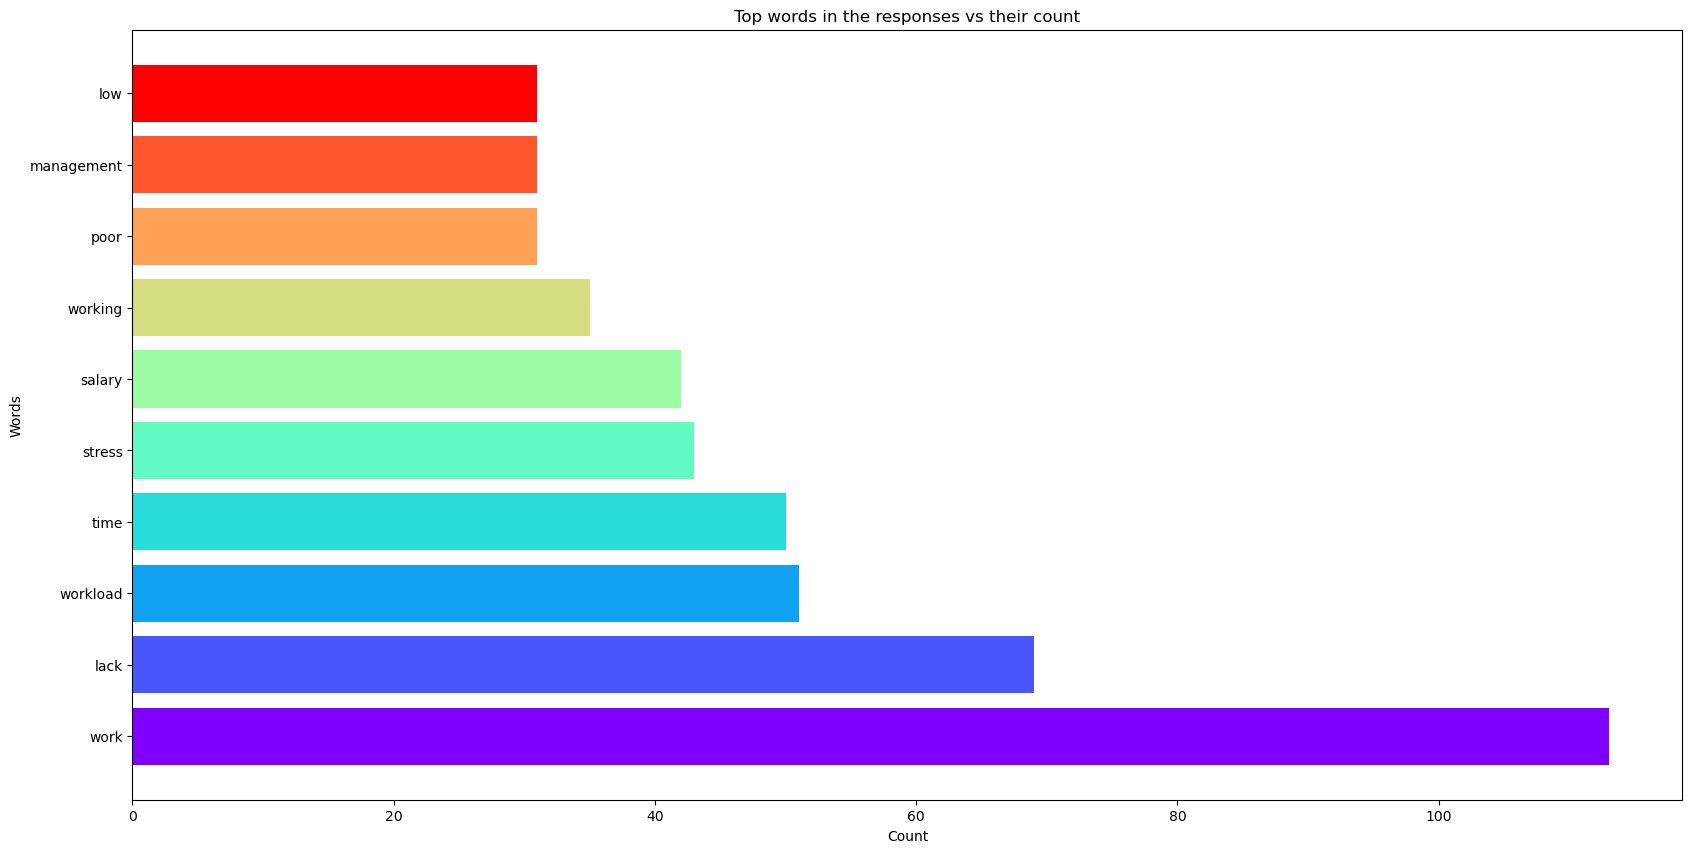

What are the TWO major challenges faced by the embryology profession, in general? 


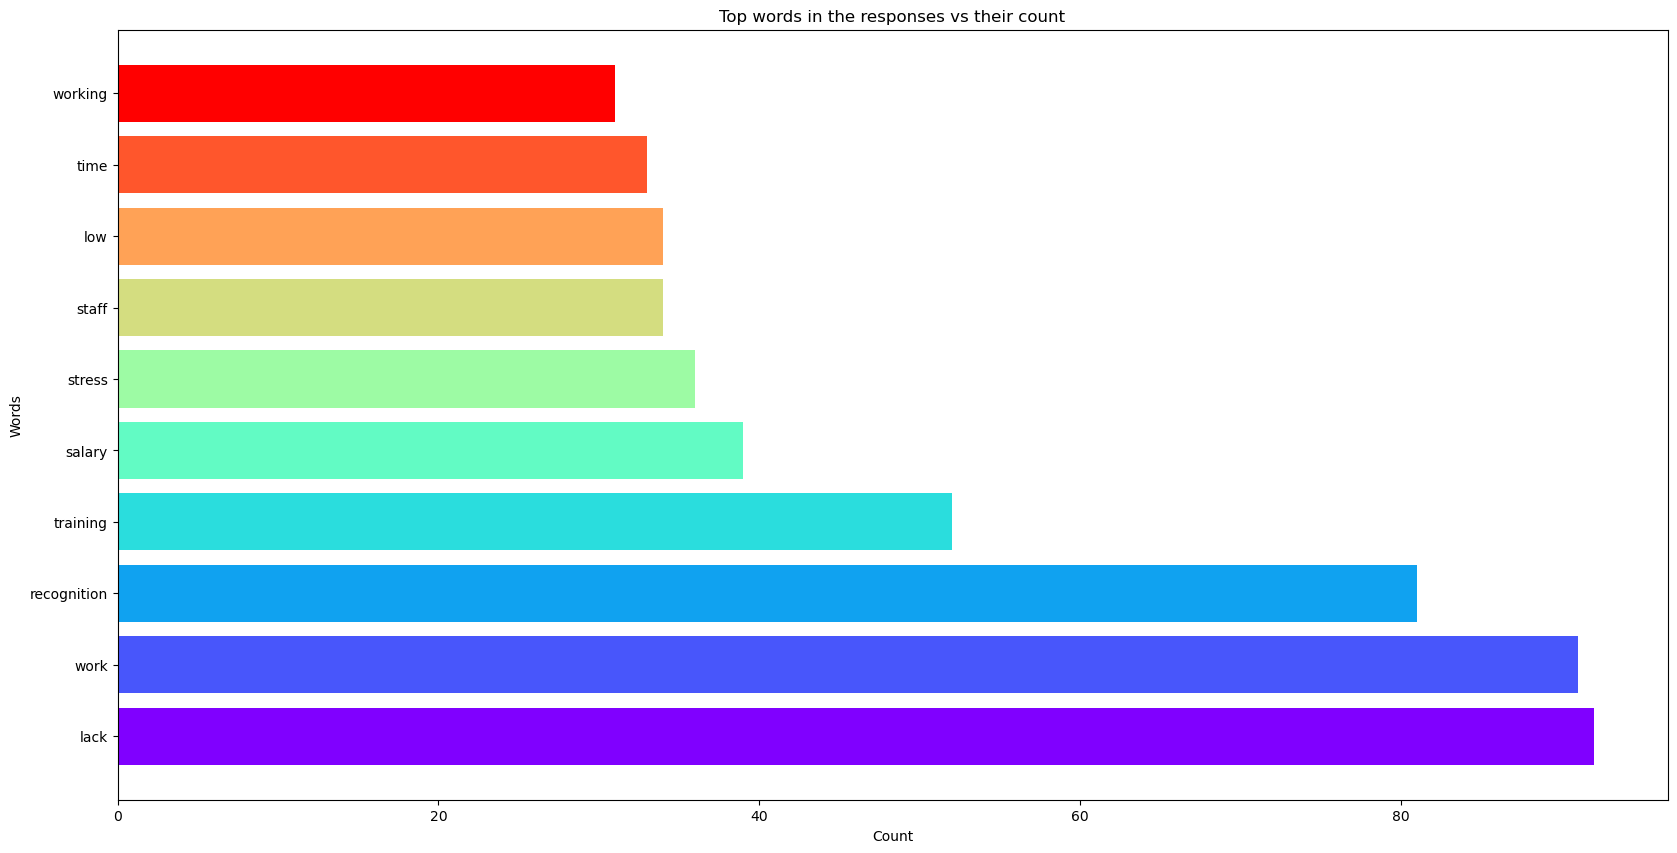

What are the TWO major challenges faced by the embryology profession, in general? 


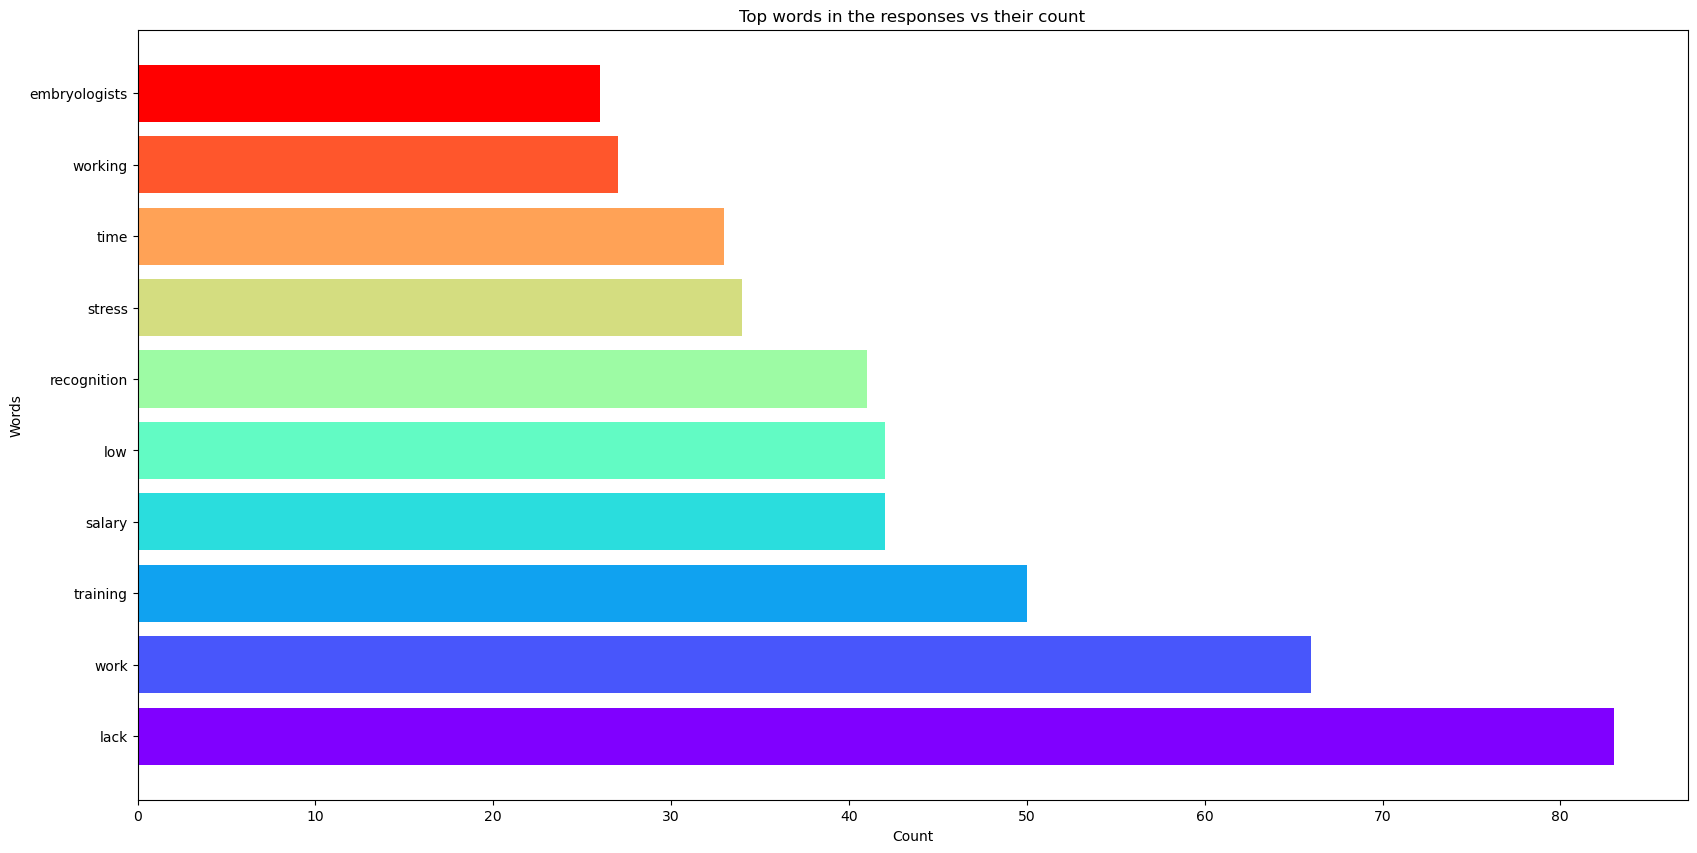

Provide TWO suggestions to improve embryologists' working conditions


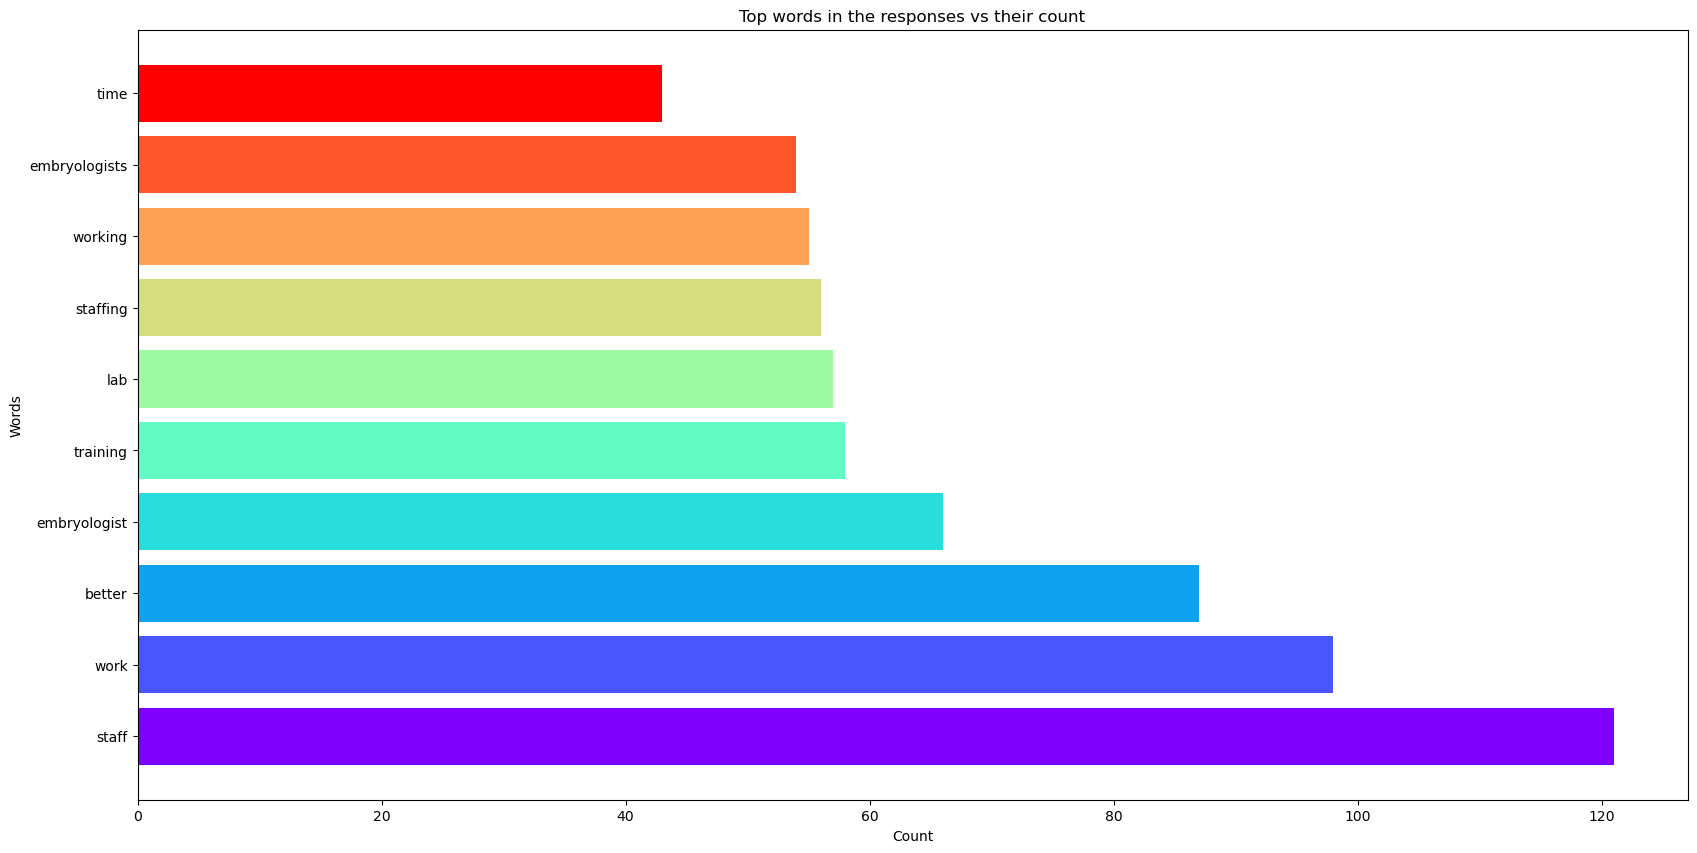

Provide TWO suggestions to improve embryologists' working conditions


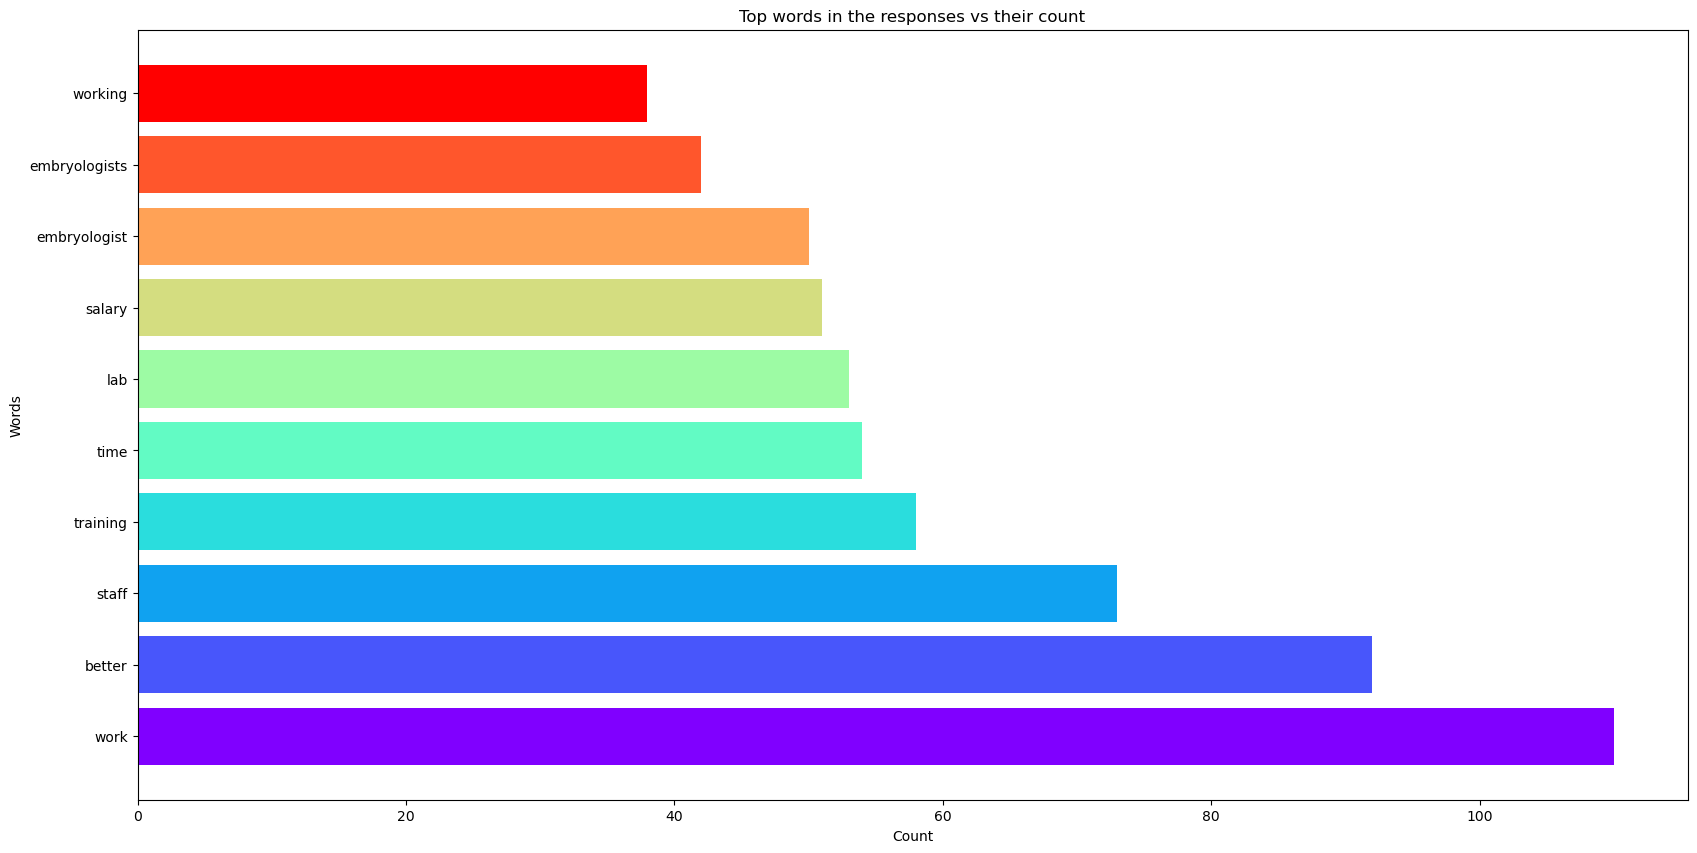

What is your career goal?


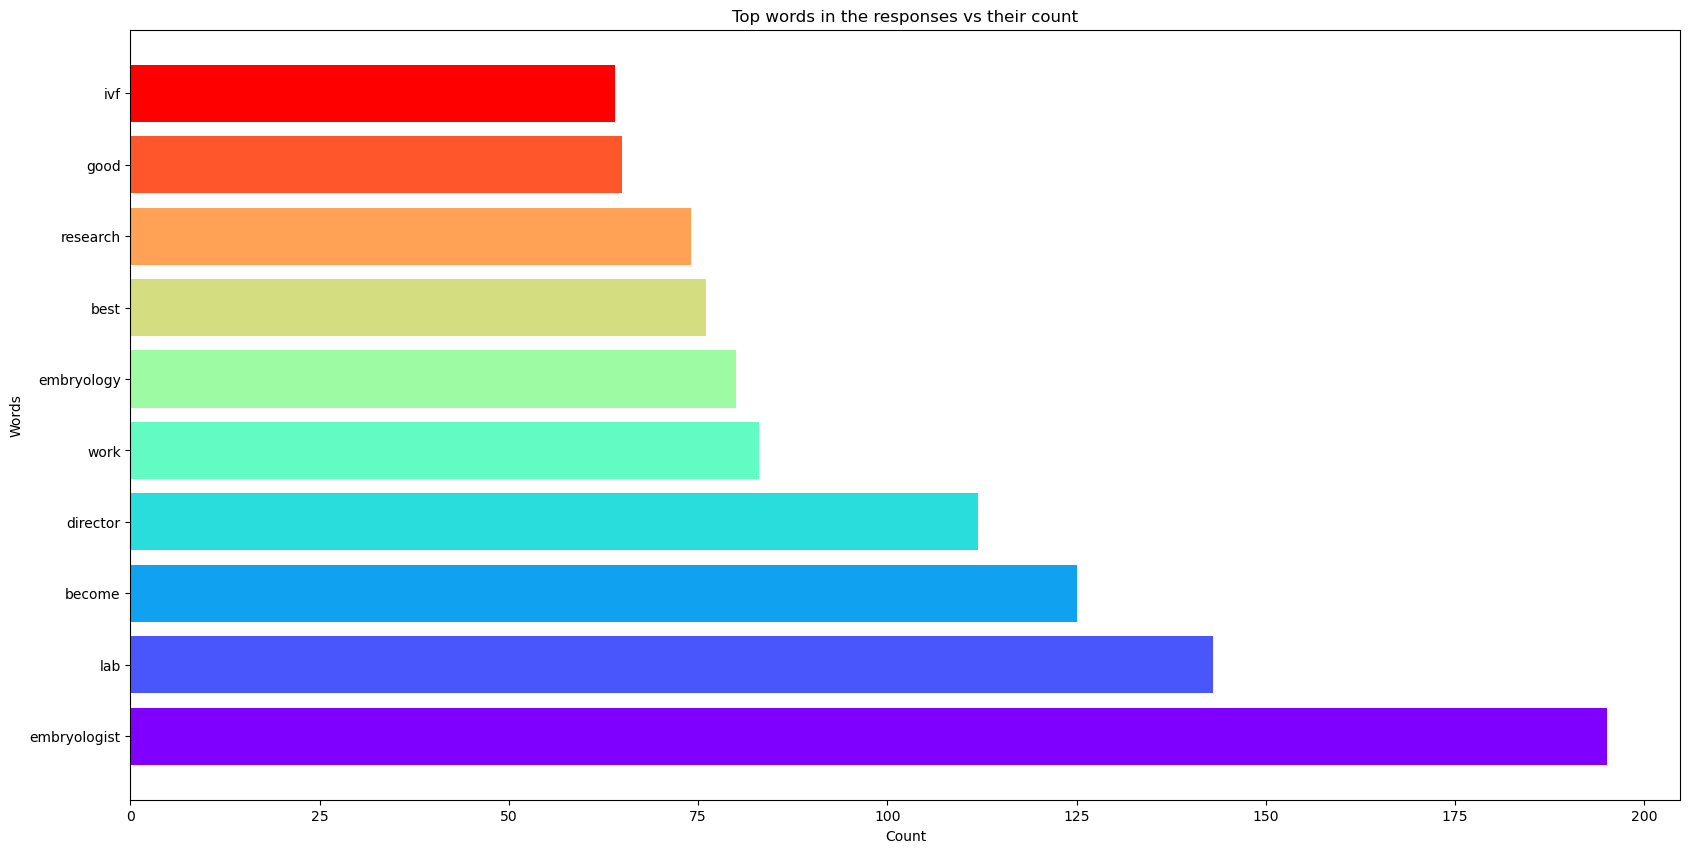

In [434]:
# iterate over all columns and generate histograms

for col_name in responses:
    print(long_col_names[col_name])
    filtered_words = [word for word in responses[col_name].split() if word not in stopwords]
    counted_words = collections.Counter(filtered_words)
    words = []
    counts = []
    for letter, count in counted_words.most_common(10):
        words.append(letter)
        counts.append(count)
    colors = cm.rainbow(np.linspace(0, 1, 10))
    rcParams['figure.figsize'] = 20, 10
    plt.title('Top words in the responses vs their count')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.barh(words, counts, color=colors)
    plt.show()

In [287]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 